In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc, erf

In [ ]:
def q_func(x):
  return 0.5 - 0.5*erf(x/np.sqrt(2))

In [ ]:
# Parâmetros
snr_db = np.arange(-30, 33, 3)  # SNR de -5 a 10 dB
num_bits = 10**5  # Número de bits para simulação Monte Carlo

In [ ]:
# Cálculo da BER teórica para BPSK
snr_linear = 10 ** (snr_db / 10) # converte snr para linear
# ber_theoretical = 0.5 * erfc(np.sqrt(snr_linear/2)) # calcula a ber teorica
ber_theoretical = q_func(np.sqrt(2*snr_linear))

In [ ]:
# Simulação Monte Carlo
ber_simulated = [] # armazena valores de ber
for snr in snr_linear:
    bits = np.random.randint(0, 2, num_bits) # gera bits aleatórios
    symbols = 2 * bits - 1  # BPSK: 0 → -1, 1 → +1
    noise = np.random.normal(0, np.sqrt(1 / (2 * snr)), num_bits) # gera ruído
    received = symbols + noise # sinal recebido
    bits_est = (received >= 0).astype(int) # demodulador por compração de nível
    ber_simulated.append(np.mean(bits != bits_est))

In [ ]:
# Configurações plot
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (8, 5),
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.alpha': 0.7,
    'legend.frameon': False,
    'legend.loc': 'lower left'
})

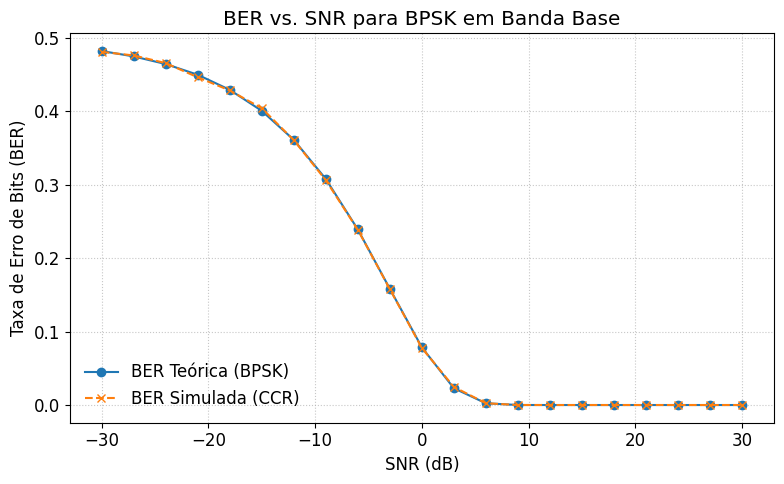

In [ ]:
plt.plot(snr_db, ber_theoretical, 'o-', label='BER Teórica (BPSK)')
plt.plot(snr_db, ber_simulated, 'x--', label='BER Simulada (CCR)')
plt.xlabel('SNR (dB)')
plt.ylabel('Taxa de Erro de Bits (BER)')
plt.title('BER vs. SNR para BPSK em Banda Base')
plt.legend()
plt.tight_layout()
plt.savefig('ber_bpsk.png', dpi=300)
plt.show()


In [ ]:
def calc_ber(snr_scale=1):
  # Cálculo da BER teórica para BPSK
  snr_linear = 10 ** (snr_db / 10) # converte snr para linear
  # ber_theoretical = 0.5 * erfc(np.sqrt(snr_linear/2)) # calcula a ber teorica
  ber_theoretical = q_func(np.sqrt(snr_scale*snr_linear))

  # Simulação Monte Carlo
  ber_simulated = [] # armazena valores de ber
  for snr in snr_linear:
      bits = np.random.randint(0, 2, num_bits) # gera bits aleatórios
      symbols = 2 * bits - 1  # BPSK: 0 → -1, 1 → +1
      noise = np.random.normal(0, np.sqrt(1 / (snr_scale * snr)), num_bits) # gera ruído
      received = symbols + noise # sinal recebido
      bits_est = (received >= 0).astype(int) # demodulador por compração de nível
      ber_simulated.append(np.mean(bits != bits_est))

  return ber_theoretical, ber_simulated

In [ ]:
ber_theoretical_2, ber_simulated_2 = calc_ber(snr_scale=2) # equações apresentadas no artigo
ber_theoretical_1, ber_simulated_1 = calc_ber(snr_scale=1) # gráfico que mais se aproxima da figura 1


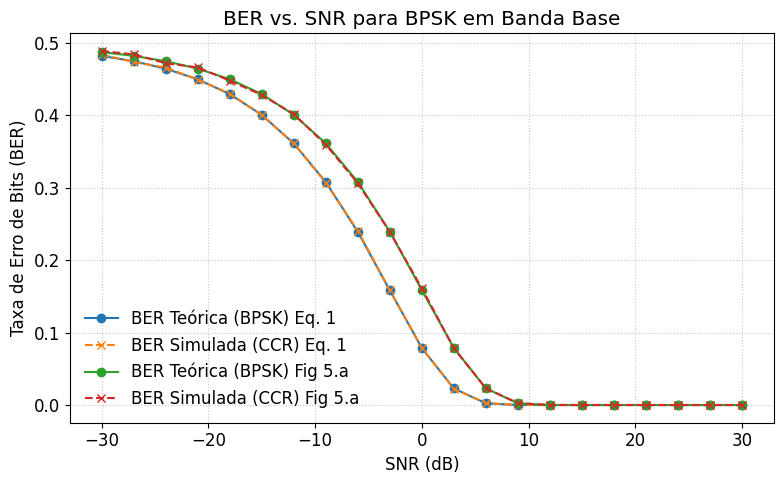

In [ ]:
plt.plot(snr_db, ber_theoretical_2, 'o-', label='BER Teórica (BPSK) Eq. 1')
plt.plot(snr_db, ber_simulated_2, 'x--', label='BER Simulada (CCR) Eq. 1')
plt.plot(snr_db, ber_theoretical_1, 'o-', label='BER Teórica (BPSK) Fig 5.a')
plt.plot(snr_db, ber_simulated_1, 'x--', label='BER Simulada (CCR) Fig 5.a')
plt.xlabel('SNR (dB)')
plt.ylabel('Taxa de Erro de Bits (BER)')
plt.title('BER vs. SNR para BPSK em Banda Base')
plt.legend()
plt.tight_layout()
plt.savefig('ber_bpsk.png', dpi=300)
plt.show()
